In [1]:
from dbfread import DBF
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import STL

plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False

In [2]:
os.getcwd()

'c:\\Users\\yis82\\OneDrive\\Desktop\\서울시'

------------

수정을 위해서 데이터 주소만 변경

In [3]:
df = DBF('./데이터\\B422. 서울시 누적강수량(월평균) 공간데이터\\2. 파일데이터\\2019\\TL_RFL_AGE_2019.dbf',encoding='euc-kr', load=True)
dbf = pd.DataFrame(df)
dbf

,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,...,ADDR_KOR,DGE_X,DGE_Y,DAMDANG,CONTENT,MK_YEAR,ETC,MTHD_NM,CMDT_NM,SOURCETHM
0,1.0,33.0,19.5,28.0,39.0,48.5,1.96,1.02,26.0,20.0,...,중구 삼일대로 231(예장동 산 5-85),"N 37°33' 21.13""","E 126°59' 31.57""",서울시,풍향/풍속/기온/강수량/강수유무/습도/일사/일조,2009-01-08,서울시청 남산별관(4층),199302.289,550710.248,07(일누적강수량)
1,0.5,27.5,18.0,39.5,32.0,47.5,1.97,1.00,25.0,19.0,...,동대문구 한천로 326(휘경동 348),"N 37°35' 20.58""","E 127°04' 11.28""",서울시,풍향/풍속/기온/강수량/강수유무/습도,2009-01-09,휘경 빗물 펌프장(2층),206164.021,554394.772,07(일누적강수량)
2,0.0,1.0,20.0,32.5,37.5,55.5,1.95,1.14,33.5,20.5,...,성북구 종암로 98-8(종암동주민센터),"N 37°35' 56.62""","E 127°02' 06.73""",서울시,풍향/풍속/기온/강수량/강수유무/습도,2009-01-08,종암동주민센터(5층)//3.15이설완료//,203108.332,555504.066,07(일누적강수량)
3,0.0,46.5,22.0,37.5,33.5,57.0,2.16,1.15,18.0,22.5,...,도봉구 해등로 25(창동 362-1),"N 37°40' 07.93""","E 127°02' 35.15""",서울시,풍향/풍속/기온/강수량/강수유무/습도,2009-01-07,도봉소방서(창동 119안전센터)(2층),203801.837,563251.524,07(일누적강수량)
4,0.5,31.5,14.5,19.5,36.0,44.0,1.82,1.16,25.0,19.0,...,마포구 성중길 82(성산동 445),"N 37°34' 25.43""","E 126°54' 02.53""",서울시,풍향/풍속/기온/강수량/강수유무/습도,2009-01-09,성산빗물펌프장(2층),191229.289,552697.015,07(일누적강수량)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,0.0,1.5,1.2,1.6,1.0,2.5,9.00,6.30,4.3,3.4,...,성동구 서울숲길 18(성수중학교),"N 37°32' 41.99""","E 127°02' 26.17""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2008,기상청 관측소,203588.239,549499.131,07(일누적강수량)
517,0.0,1.2,1.0,1.3,0.9,2.6,6.30,6.00,6.5,2.6,...,구로구 부일로 893(온수초등학교),"N 37°28' 59.88""","E 126°49' 59.87""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2008,기상청 관측소,185255.990,542663.612,07(일누적강수량)
518,0.0,1.2,0.9,1.6,1.4,2.1,8.90,6.40,4.6,2.9,...,강북구 도봉로89길 13(강북구청),"N 37°37' 59.88""","E 127°00' 06.12""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2008,기상청 관측소,200150.175,559298.951,07(일누적강수량)
519,0.0,1.7,1.4,1.6,1.0,2.7,8.70,6.30,5.3,4.0,...,서울특별시 관악구 남현동 사서함 20003호,"N 37°27' 46.80""","E 126°59' 09.60""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2013-02-18,,198761.439,540397.847,07(일누적강수량)


----------

In [4]:
stationarity = False

In [5]:
for i in range(1, 13):
    column_name = f'M0{i}' if i < 10 else f'M{i}'  
    missing_count = dbf[column_name].isna().sum()
    print(f'Column {column_name}: {missing_count} missing values')


Column M01: 0 missing values
Column M02: 0 missing values
Column M03: 0 missing values
Column M04: 0 missing values
Column M05: 0 missing values
Column M06: 0 missing values
Column M07: 0 missing values
Column M08: 0 missing values
Column M09: 0 missing values
Column M10: 0 missing values
Column M11: 0 missing values
Column M12: 0 missing values


In [6]:
col_name = []
for i in range(1, 13):
    column_name = f'M0{i}' if i < 10 else f'M{i}'  
    missing_count = dbf[column_name].fillna(1, inplace= True)
    col_name.append(column_name)


In [7]:
condition = dbf['NAME'] == '[기]서울'

In [8]:
seoul_df = dbf[condition]
seoul_df.head(3)

,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,...,ADDR_KOR,DGE_X,DGE_Y,DAMDANG,CONTENT,MK_YEAR,ETC,MTHD_NM,CMDT_NM,SOURCETHM
25,0.0,0.0,19.5,38.5,38.0,48.5,1.90,1.13,30.5,19.5,...,종로구 송월길 52(서울기상관측소),"N 37°34' 17.00""","E 126°57' 56.16""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2008,기상청 관측소,196961.427,552433.066,07(일누적강수량)
94,4.0,0.0,22.0,47.5,6.5,69.5,1.02,1.37,85.5,44.0,...,종로구 송월길 52(서울기상관측소),"N 37°34' 17.00""","E 126°57' 56.16""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2008,기상청 관측소,196961.427,552433.066,07(일누적강수량)
168,14.5,26.5,17.0,27.0,59.0,71.0,89.50,99.00,259.5,15.0,...,종로구 송월길 52(서울기상관측소),"N 37°34' 17.00""","E 126°57' 56.16""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2008,기상청 관측소,196961.427,552433.066,07(일누적강수량)


In [9]:
melt_df = pd.melt(seoul_df[col_name])
melt_df

,variable,value
0,M01,0.0
1,M01,4.0
2,M01,14.5
3,M01,3.5
4,M01,4.0
...,...,...
115,M12,20.0
116,M12,14.0
117,M12,10.0
118,M12,0.0


In [10]:
test_df = melt_df.drop('variable', axis = 1)

In [11]:
start_date = '2010-01-01'
end_date = '2020-01-01'
monthly_index = pd.date_range(start=start_date, end=end_date, freq='M')

# Extract and format only the months and years
formatted_index = monthly_index.strftime('%y-%m')

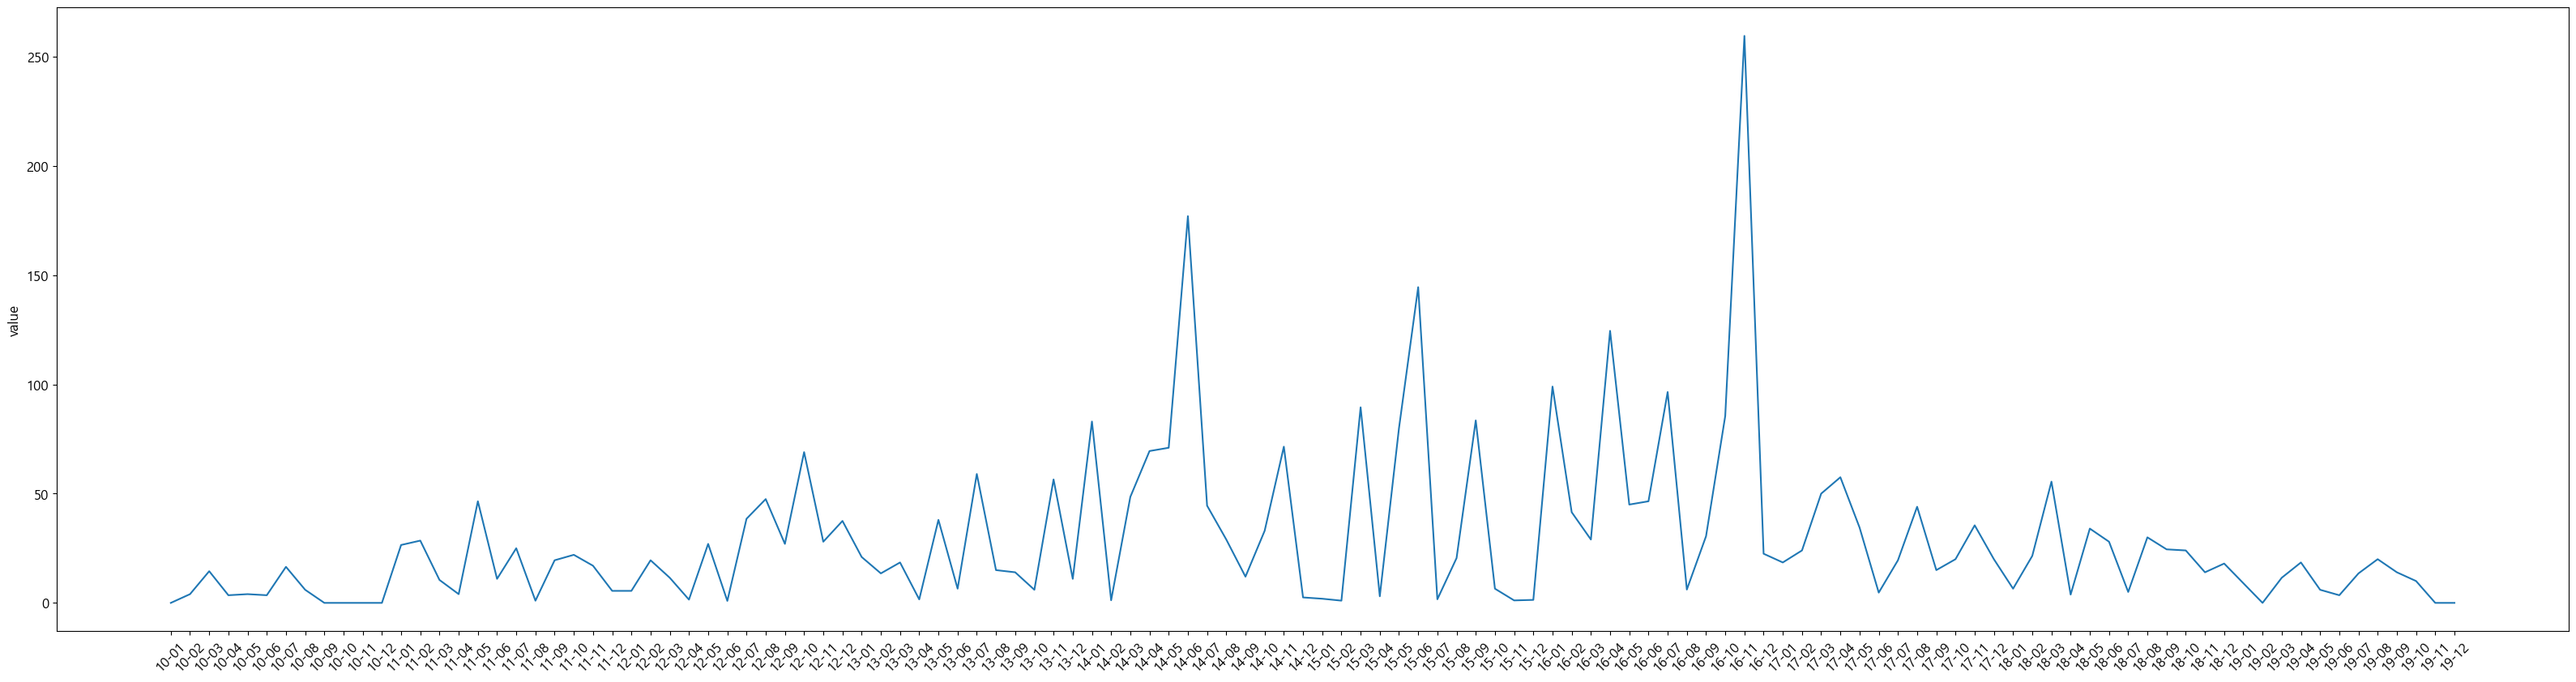

In [12]:
plt.rcParams["figure.figsize"] = (40, 10)
sb.lineplot(data = test_df, x = formatted_index,  y = 'value')
plt.xticks(rotation= 45)
plt.show()
plt.close()

In [13]:
test_df['value']

0       0.0
1       4.0
2      14.5
3       3.5
4       4.0
       ... 
115    20.0
116    14.0
117    10.0
118     0.0
119     0.0
Name: value, Length: 120, dtype: float64

In [14]:
rainfall = pd.Series(test_df['value'])
rainfall

0       0.0
1       4.0
2      14.5
3       3.5
4       4.0
       ... 
115    20.0
116    14.0
117    10.0
118     0.0
119     0.0
Name: value, Length: 120, dtype: float64

In [15]:
temp_test_df=test_df.set_index(monthly_index)
temp_test_df

,value
2010-01-31,0.0
2010-02-28,4.0
2010-03-31,14.5
2010-04-30,3.5
2010-05-31,4.0
...,...
2019-08-31,20.0
2019-09-30,14.0
2019-10-31,10.0
2019-11-30,0.0


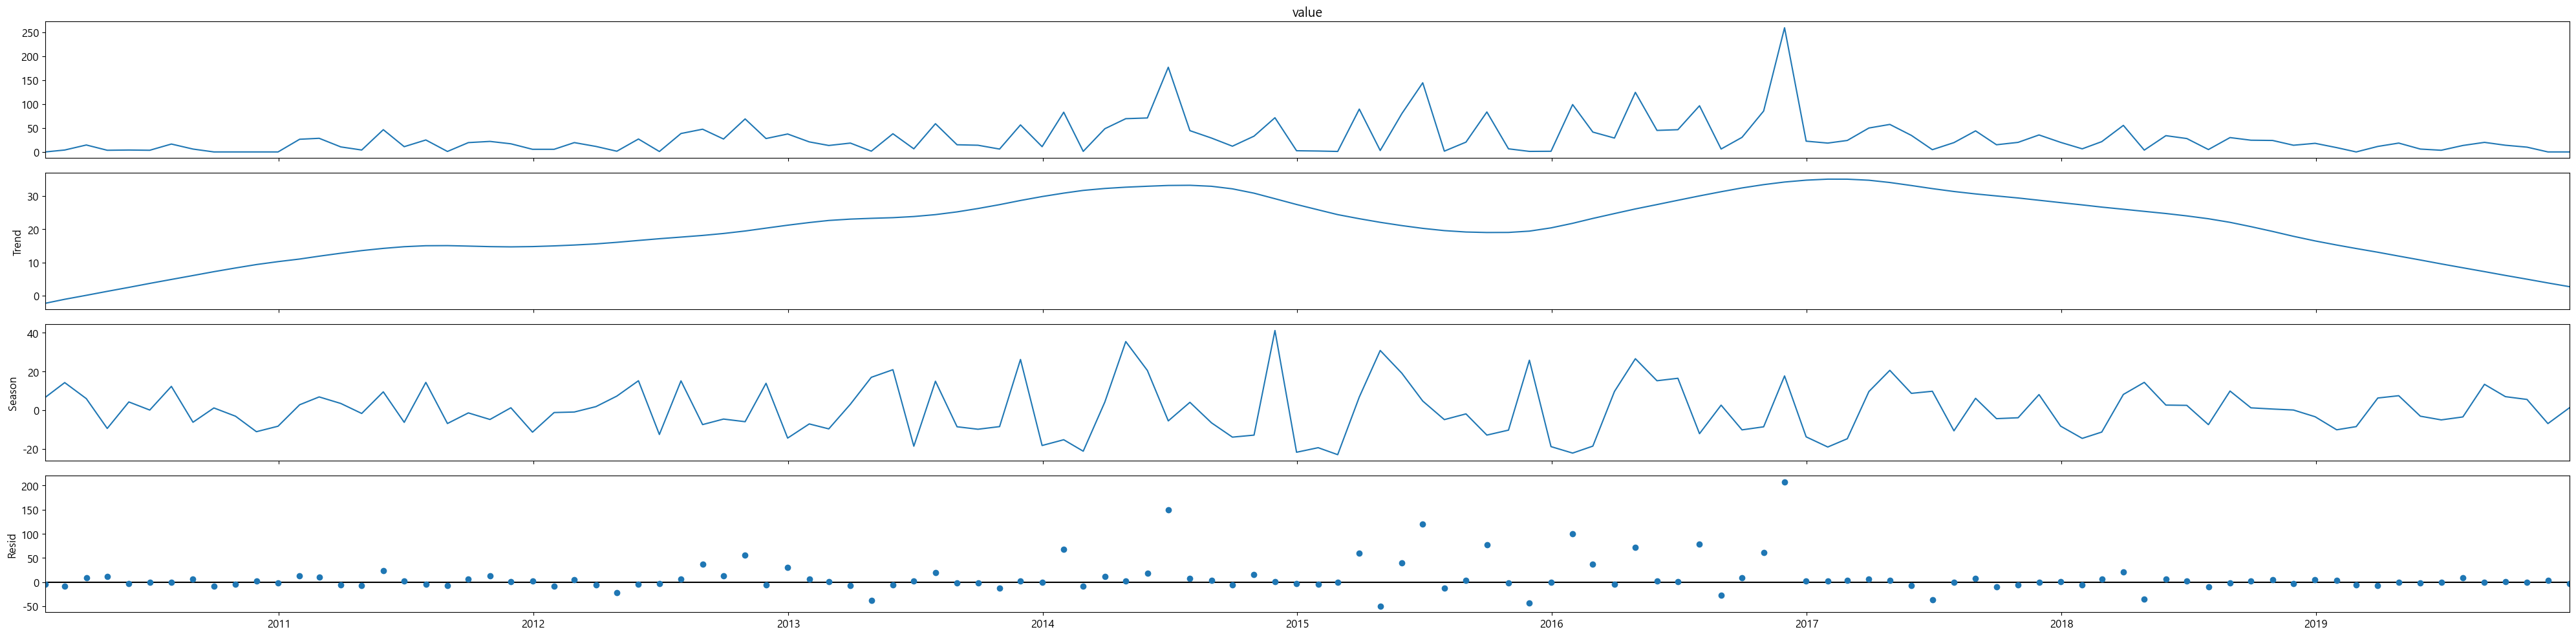

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


# Perform STL decomposition
#stl = STL(rainfall, seasonal=13)  # You can adjust the seasonal period as needed

# test
stl = STL(temp_test_df['value'], period=12, robust=True)

# Fit the decomposition
result = stl.fit()

# Plot the decomposed components
fig = result.plot()
plt.show()


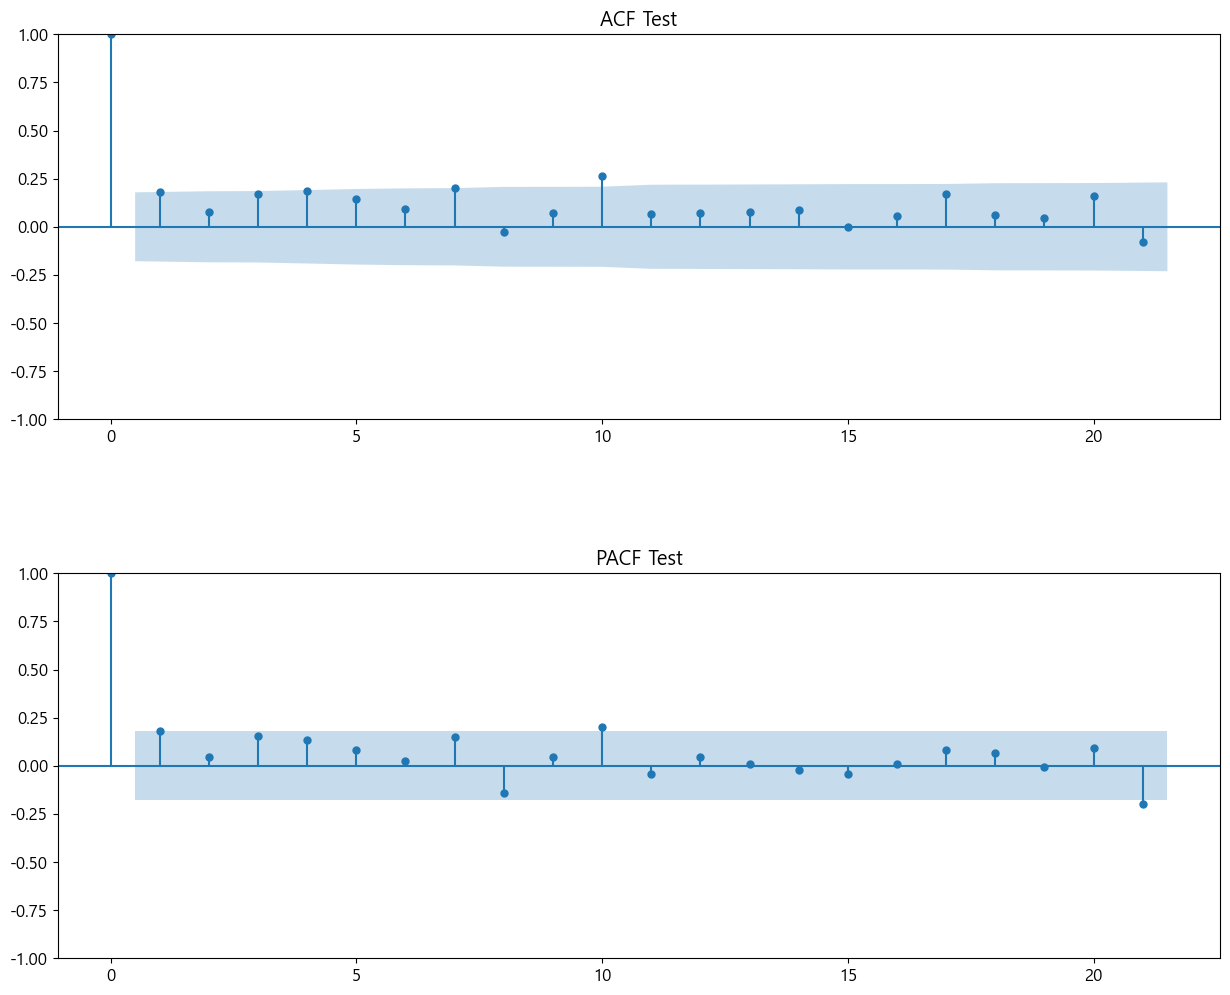

In [18]:

# ACF, PACF 검정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
fig.subplots_adjust(hspace=0.4)

plot_acf(temp_test_df['value'], ax=ax1)
ax1.title.set_text("ACF Test")
    
plot_pacf(temp_test_df['value'], ax=ax2)
ax2.title.set_text("PACF Test")
    
plt.show()
plt.close()

In [19]:
ar = adfuller(temp_test_df['value'])
ardict = {
        '검정통계량(ADF Statistic)': [ar[0]],
        '유의수준(p-value)': [ar[1]],
        '최적차수(num of lags)': [ar[2]],
        '관측치 개수(num of observations)': [ar[3]]   
    }

for key, value in ar[4].items():
    ardict['기각값(Critical Values) %s' % key] = value

stationarity = ar[1] < 0.05
ardict['데이터 정상성 여부(0=Flase,1=True)'] = stationarity

ardf = DataFrame(ardict, index=['ADF Test']).T

print(tabulate(ardf, headers=["ADF Test", ""], tablefmt='psql', numalign="right"))


+------------------------------------+-------------+
| ADF Test                           |             |
|------------------------------------+-------------|
| 검정통계량(ADF Statistic)          |    -9.00877 |
| 유의수준(p-value)                  | 6.20748e-15 |
| 최적차수(num of lags)              |           0 |
| 관측치 개수(num of observations)   |         119 |
| 기각값(Critical Values) 1%         |    -3.48653 |
| 기각값(Critical Values) 5%         |    -2.88615 |
| 기각값(Critical Values) 10%        |     -2.5799 |
| 데이터 정상성 여부(0=Flase,1=True) |           1 |
+------------------------------------+-------------+


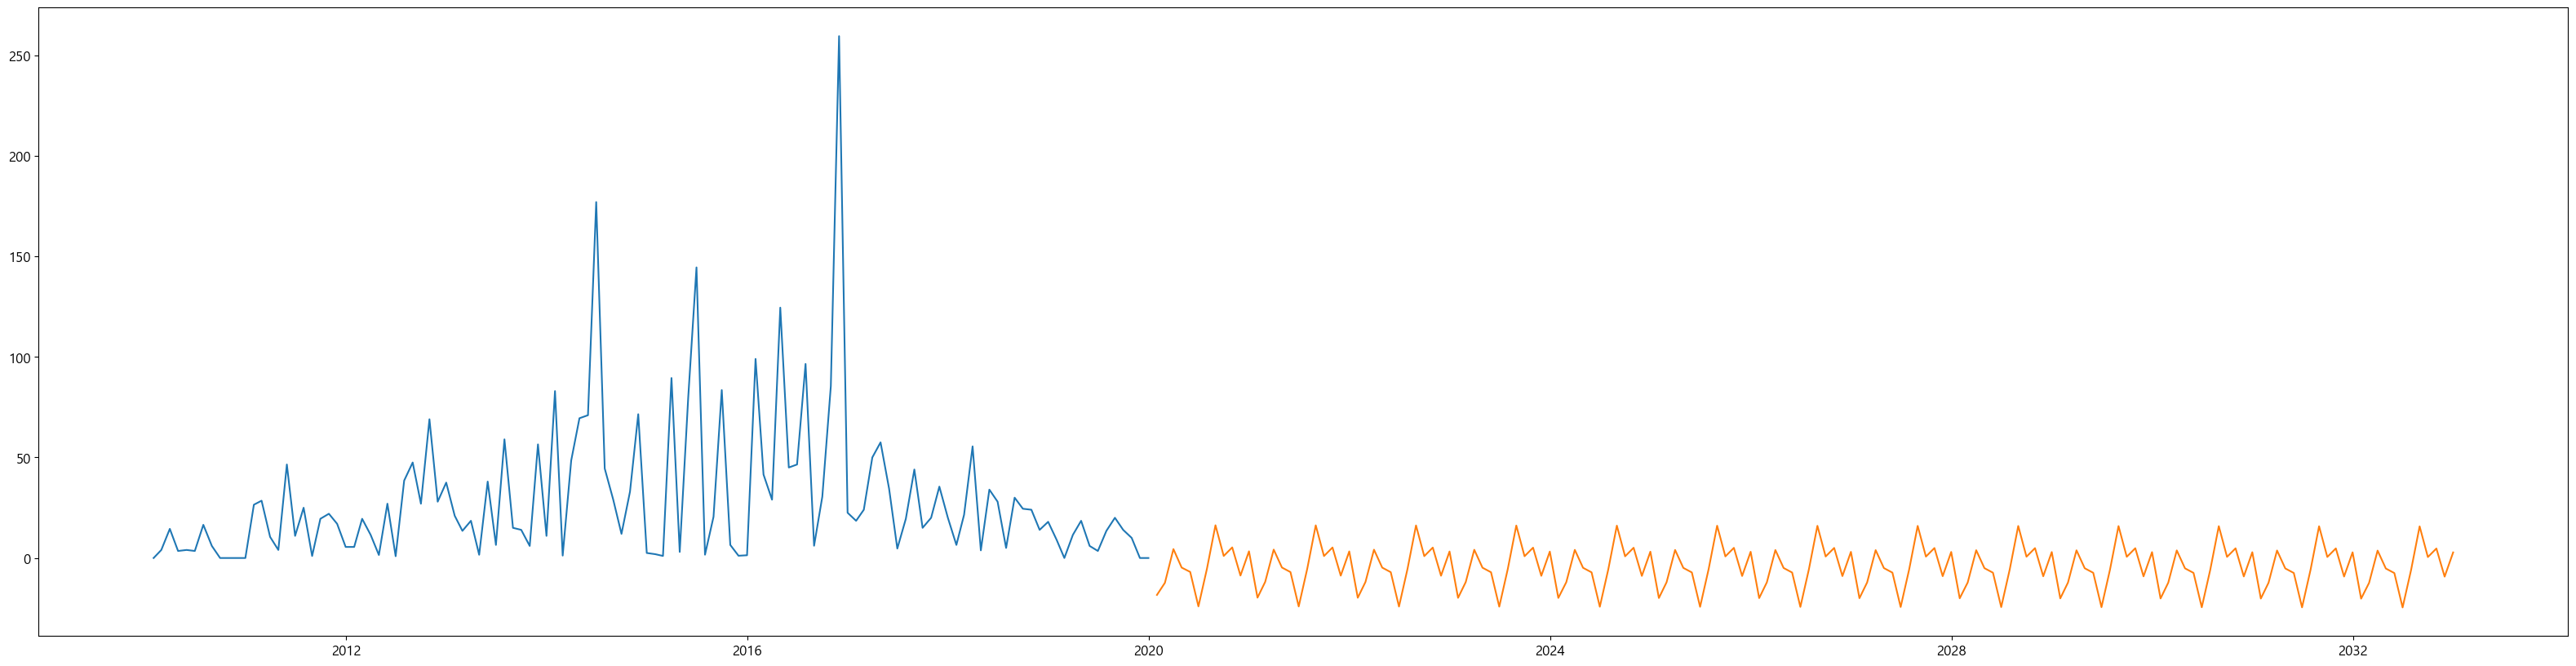

In [20]:
from statsmodels.tsa.forecasting.stl import STLForecast

stlf = STLForecast(temp_test_df['value'], ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()
forecast = stlf_res.forecast(156)
plt.plot(temp_test_df)
plt.plot(forecast)
plt.show()
